In [1]:
# veri mi model mi ?
#veri kullanacağımız ver, model ise öğreteceğimiz makine öğrenmesi modeli.

## Veri Temizleme - Data Cleaning

In [ ]:
# gürültülü veri, eksik veri, aykırı gözlemden oluşur. 

In [ ]:
# yanlış veri: gürültülü veri. Cinsiyet erkek, hamile mi evet. 
# bebek biberonu 1 milyon tl ise, outlier olması imkansız ise bu da gürültülü yani yanlış veridir. 

### Aykırı Gözlem:

In [ ]:
#Aykırı değeri barındıran değer birimi aykırı gözlemdir. Outliers

In [ ]:
#Genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır. Yanlılığa sebep olur. 

#### Kime göre aykırı gözlem??

In [2]:
# 1 - Sektör bilgisi. 
#Ev fiyat tahmin modelinde 1000 metrekarelik evleri modele almama gibi. 
# 2 - Standart sapma yaklaşımı
# Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir. 
# 1,2 ya da 3 standart sapma değeri ortlam üzerine eklenerek ortaya çıkan bu değer eşik değeri olarak düşünülür 
# ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.
# 3 - Z Score'u yaklaşımı.  Değişken normal standart dağılıma uyalanır yani standartlaştırılır. 
# 4 - BoxPlot yöntemi. 

##### Aykırı değerleri yakalamak - Python

In [61]:
import numpy as np
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include= ['float64','int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table = df['table']

In [6]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

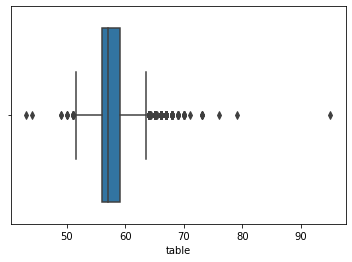

In [7]:
sns.boxplot(x= df_table)

In [9]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1 #Interquartile

In [10]:
Q1,Q3,IQR

(56.0, 59.0, 3.0)

In [13]:
alt_sinir = Q1-1.5 *IQR
ust_sinir = Q3 + 1.5 * IQR

In [14]:
alt_sinir,ust_sinir

(51.5, 63.5)

In [18]:
(df_table < alt_sinir) | (df_table > alt_sinir)

0        True
1        True
2        True
3        True
4        True
         ... 
53935    True
53936    True
53937    True
53938    True
53939    True
Name: table, Length: 53940, dtype: bool

In [19]:
df_table[(df_table < alt_sinir) | (df_table > alt_sinir)]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [85]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

,table
0,False
1,False
2,False
3,False
4,False


#### Silme Yöntemi

In [26]:
import pandas as pd

In [27]:
type(df_table)

pandas.core.series.Series

In [28]:
df_table = pd.DataFrame(df_table)
df_table.shape

(53940, 1)

In [81]:
t_df = df_table[~((df_table <alt_sinir) | (df_table>ust_sinir)).any(axis=1)]  # tilda : koşulu sağlamayanları al demeki aykırı olmayanları seç

In [36]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [82]:
t_df.shape

(53335, 1)

#### Ortalama ile doldurma

In [83]:
df_table = pd.DataFrame(df_table)
df_table.shape

(53940, 1)

In [93]:
df_table = df['table']

In [94]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [95]:
aykiri_tf = aykiri_tf['table']

KeyError: 'table'

In [89]:
aykiri_tf[aykiri_tf == True].shape

(16,)

In [46]:
df_table[aykiri_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [47]:
df_table.mean()

table    57.457184
dtype: float64

In [91]:
df_table.shape

(53940, 1)

In [92]:
aykiri_tf.shape

(53940,)

In [96]:
df_table[aykiri_tf] = df_table.mean()

<ipython-input-96-57ba1f56a480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [97]:
aykiri_tf.shape,df_table.shape

((53940,), (53940,))

In [98]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

#### Baskılama Yöntemi

In [99]:
# üST DEĞERDEYSE ÜST ORTALAMA İLE, ALT DEĞERDEYSE ALT ORTALAMAYA GÖRE ATANARAK BASKILANABİLİR

In [100]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [101]:
alt_sinir

51.5

In [103]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-103-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [104]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi

In [106]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64','int64'])
df =diamonds.copy()
df= df.dropna()
df.head()

#Lof local outlier factor her değer için yoğunluk score'u veriyor. 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [107]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [108]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [110]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [111]:
df_scores = clf.negative_outlier_factor_

In [112]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [115]:
np.sort(df_scores)[0:20]  #MESELA 10.değerin score'unu eşik değer olarak belirlerse bu score 
#altındakiler aykırı değer üzerindekiler de modele vereceğimiz datalar olacaktır. 

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [114]:
np.sort(df_scores)[13]

-3.823787967755565

In [116]:
esik_deger = np.sort(df_scores)[13]

In [117]:
aykiri_tf = df_scores > esik_deger

In [118]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [120]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [119]:
yeni_Df = df[df_scores > esik_deger]
yeni_Df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


#### Baskılama Yöntemi

In [121]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [122]:
baski_deger = df[df_scores == esik_deger]

In [125]:
aykirilar = df[~aykiri_tf]   # aykırı değer dışındakileri aldı değişken ismine takılma
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [ ]:
# karışık aldığımız çin indexleri karıştı ve indexleri yeniden atamalıyız

In [129]:
res = aykirilar.to_records(index=False) # araaya döndürdük

In [130]:
res[:] = baski_deger.to_records(index=False)

In [131]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [133]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [135]:
df[~aykiri_tf] = pd.DataFrame(res,index = df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


### Eksik Veri Analizi

In [ ]:
# eksik gözlemler yalnızca rastgele ortaya gelmiş ise silinebilri. 
#Yapısal bir bozukluk nedeni ile boş olan satırlar silinemez silinir ise modelimizde ciddi yanlılıklara neden olacaktır. 


> #### Eksik Veri Türleri 

In [ ]:
# Tümüyle rastlantısal kayıp: diğer değişkenler veya yapısal bir nedenden kaynkalı olmayan. 
# Rastlantısla Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü. 
# Rastalntısal olmayan Kayıp = Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü. 

In [137]:
# Eksik Veri Rassallığının Testleri: Görsel Teknikler, Bağımsız İki Örneklem Testi, Korelasyon Testi, Little'ın MCAR Testi

In [ ]:
# Silme Yöntemleri: 
#    Gözlem ya da değişken silme
#    Liste basında silme
#    çiftler bazında silme
# Değer Atama Yöntemleri:
#    Ortanca, ortalama,medyan
#    En benzer birime atama
#    Dış Kaynaklı Atama   
# Tahmine Dayalı Yöntemler
#    Makine Öğrenmesi
#    EM
#    Çoklu Atama Yöntemi

> #### Eksik Veri Hızlı Çözümleri 

In [141]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [142]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [143]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [144]:
df.isnull().sum().sum()

7

In [145]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [146]:
df[df.isnull().any(axis=1)] # en az bir tane eksik değer var ise seç

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [150]:
df[df.notnull().all(axis=1)] # hepsi dolu olanları getir sütunlara göre

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [151]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
# Eksik değerlerin direk silinmesi

In [152]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [153]:
df.dropna(inplace= True)

In [154]:
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [155]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [156]:
df["V1"].mean()

6.0

In [157]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [158]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [ ]:
# Otomatik doldurma elimizde 10 değişken var ve hepsine otomatik ortalama değeri atamak istiyoruz

In [159]:
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)   #x sütunları belirtiyor. 

## Veri Standardiasyonu

In [ ]:
# Veri Standardizasyonu (Data Standardization , feature Scaling)
# - 0-1 dönüşümü (normalizasyon)
# - z-skoruna dönüştürme (Standardizasyon)
# - Logaritmik Dönüşüm (Log Transformation)

## Veri İndirgeme

In [ ]:
# Veri İndirgeme (Data Reduction)
# Gözlem sayısının azaltılması
# Deişken sayısının azaltılması

## Değişken Dönüşmleri

In [ ]:
# Değişken dönüşümleri (VARİABLE tRANSFORMATİON)
#Sürekli değişkenlerde dönüşümler
# Kategorik değişkenlerde dönüşümler